Perceptron Training (ω = class label)

Epoch 1
----------
 Step 1: x=[1.  0.5 3. ], label=1
   net = w·x = 0.000, prediction = 1
   Misclassified → Δw = [1.  0.5 3. ]
   Updated weights = [1.  0.5 3. ]

 Step 2: x=[1. 1. 3.], label=1
   net = w·x = 10.500, prediction = 1
   Correctly classified → No update

 Step 3: x=[1.  0.5 2.5], label=1
   net = w·x = 8.750, prediction = 1
   Correctly classified → No update

 Step 4: x=[1.  1.  2.5], label=1
   net = w·x = 9.000, prediction = 1
   Correctly classified → No update

 Step 5: x=[1.  1.5 2.5], label=1
   net = w·x = 9.250, prediction = 1
   Correctly classified → No update

 Step 6: x=[1.  4.5 1. ], label=-1
   net = w·x = 6.250, prediction = 1
   Misclassified → Δw = [-1.  -4.5 -1. ]
   Updated weights = [ 0. -4.  2.]

 Step 7: x=[1. 5. 1.], label=-1
   net = w·x = -18.000, prediction = -1
   Correctly classified → No update

 Step 8: x=[1.  4.5 0.5], label=-1
   net = w·x = -17.000, prediction = -1
   Correctly classified → No updat

RuntimeError: Requested MovieWriter (ffmpeg) not available

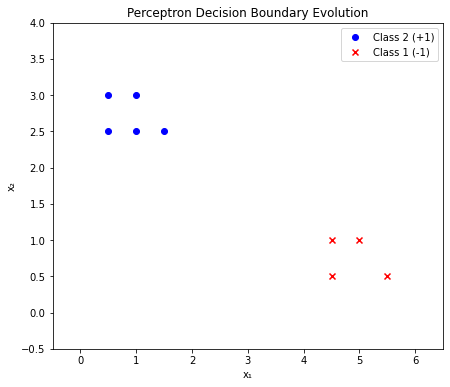

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

data = np.array([
    [0.5, 3.0, 2],
    [1.0, 3.0, 2],
    [0.5, 2.5, 2],
    [1.0, 2.5, 2],
    [1.5, 2.5, 2],
    [4.5, 1.0, 1],
    [5.0, 1.0, 1],
    [4.5, 0.5, 1],
    [5.5, 0.5, 1]
])

y = np.where(data[:, 2] == 2, 1, -1)
X = data[:, :2]

X_aug = np.hstack((np.ones((X.shape[0], 1)), X))


w = np.zeros(3)
lr = 1.0
max_epochs = 20
weight_snapshots = [w.copy()]
step = 0

print("Perceptron Training (ω = class label)\n===================================\n")


for epoch in range(1, max_epochs + 1):
    print(f"Epoch {epoch}\n----------")
    changed = False

    for i in range(X_aug.shape[0]):
        xi = X_aug[i]
        yi = y[i]

        # Compute net input
        net = np.dot(w, xi)

        # Activation (sign function)
        pred = 1 if net >= 0 else -1

        print(f" Step {step + 1}: x={xi}, label={yi}")
        print(f"   net = w·x = {net:.3f}, prediction = {pred}")

        # Update weights if misclassified
        if yi * net <= 0:
            delta = lr * yi * xi
            print(f"   Misclassified → Δw = {delta}")
            w = w + delta
            changed = True
            weight_snapshots.append(w.copy())
            print(f"   Updated weights = {w}\n")
        else:
            print("   Correctly classified → No update\n")

        step += 1

    if not changed:
        print("Converged!\n")
        break

print("Final Weights:", w, "\n")


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
ax.set_ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_title("Perceptron Decision Boundary Evolution")

# Plot data points
class_pos = y == 1
class_neg = y == -1
ax.scatter(X[class_pos, 0], X[class_pos, 1], c='blue', marker='o', label='Class 2 (+1)')
ax.scatter(X[class_neg, 0], X[class_neg, 1], c='red', marker='x', label='Class 1 (-1)')
ax.legend()

line, = ax.plot([], [], 'k-', linewidth=2)
weights_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, va='top')


def decision_line_from_w(w):
    xs = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
    if abs(w[2]) < 1e-8:
        xv = -w[0] / w[1]
        ys = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 2)
        xs = np.array([xv, xv])
        return xs, ys
    ys = -(w[0] + w[1] * xs) / w[2]
    return xs, ys


def init():
    line.set_data([], [])
    weights_text.set_text('')
    return line, weights_text

def animate(i):
    wcur = weight_snapshots[i]
    xs, ys = decision_line_from_w(wcur)
    line.set_data(xs, ys)
    weights_text.set_text(f"weights = {np.round(wcur, 3)}\nFrame {i}/{len(weight_snapshots)-1}")
    return line, weights_text

anim = animation.FuncAnimation(
    fig, animate,
    frames=len(weight_snapshots),
    init_func=init,
    interval=800,
    blit=True,
    repeat=False
)

HTML(anim.to_html5_video())

In [2]:
import sys
print(sys.executable)


C:\Users\Nischitha G\anaconda3\python.exe
